In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_validate, cross_val_score, RandomizedSearchCV
import warnings
import joblib
import os
import math
warnings.filterwarnings("ignore")

In [83]:
def RF_Model(root,root_model,target):
        df = pd.read_excel(root)
        assay = df[['Cu%', 'Mo%','AgPPM', 'AuPPM', 'Al%', 'Ca%', 'Fe%', 'Mg%', 'Na%', 'S%']]
        hardness= df[target]
        #Assay = X, Hardness = Y
        X_train, X_test, y_train, y_test = train_test_split(assay, hardness, test_size=0.2, random_state=42)
        # Normalizar los datos
        scaler = MinMaxScaler(feature_range=(0,1))
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        print('RandomForestRegressor')
        
        rg = {'bootstrap': [True, False], 
                'max_depth': [10,50,100,500,750,1000,None],
                'max_features': ['auto', 'sqrt','log2',0.2,0.3,0.6,0.9], 
                'min_samples_leaf': [1,2,4,16,32,64,128],
                'min_samples_split': [2,5,10,20,40,80], 
                'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
        
        gsc = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=rg, n_iter=100, cv=5, verbose=0, random_state=42,n_jobs=-1)
        #gsc = GridSearchCV(estimator=RandomForestRegressor(), cv=5, param_grid=rg , scoring='neg_mean_absolute_error',n_jobs=-1)
        
        grid_result = gsc.fit(X_train, y_train)
        best_params = grid_result.best_params_
        rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], min_samples_leaf=best_params["min_samples_leaf"],max_features= best_params["max_features"],
                                        min_samples_split=best_params["min_samples_split"],bootstrap=best_params["bootstrap"],verbose=0, warm_start=True,random_state=42,n_jobs=-1)
        print("Best Params: ",best_params)
        rfr.fit(X_train, y_train)
        file_model= 'model_rf'+'.pkl'
        file_model = os.path.join(root_model, file_model)
        file_scaler= 'scaler_rf.pkl'
        file_scaler = os.path.join(root_model, file_scaler)
        joblib.dump(rfr,file_model)
        joblib.dump(scaler,file_scaler)
        
        print("Scoring Analysis and Graphics")
        scoring = {'abs_error': 'neg_mean_absolute_error', 'squared_error': 'neg_mean_squared_error', 'r2': 'r2','explained_variance': 'explained_variance'}
        scores = cross_validate(rfr, X_train, y_train, cv=10, scoring=scoring, return_train_score=True)
        print("Random Forest Regression Analysis")
        print("MAE :", abs(scores['train_abs_error'].mean()), "| RMSE :",
              math.sqrt(abs(scores['train_squared_error'].mean())),
              "| R2 :", scores['train_r2'].mean(), "| EV :", scores['train_explained_variance'].mean())
        yp = rfr.predict(X_train)
        data = pd.concat([y_train,pd.DataFrame(yp)],axis=1)
        sns.histplot(data,kde=True)
        plt.show()
        plt.figure(figsize=(12, 6))
        sns.lineplot(data, markers=True, dashes=False)
        plt.show()



RandomForestRegressor
Best Params:  {'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 0.2, 'max_depth': 1000, 'bootstrap': True}
Scoring Analysis and Graphics
Random Forest Regression Analysis
MAE : 12.290880032700551 | RMSE : 15.97638180840517 | R2 : 0.8185026275618508 | EV : 0.8185069547963275


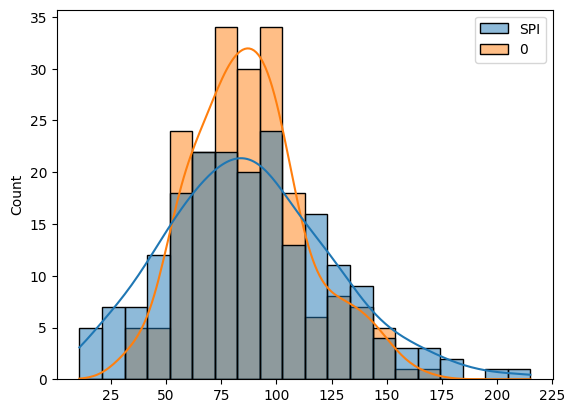

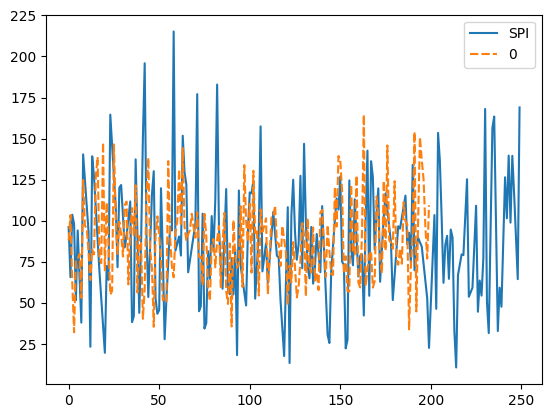

In [81]:
target = 'SPI'
root = '../03_BBDD/data_dureza_train.xlsx'
root_model = '../04_Model/Hardness/SPI/'

RF_Model(root,root_model,target)

RandomForestRegressor
Best Params:  {'n_estimators': 1400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 750, 'bootstrap': True}
Scoring Analysis and Graphics
Random Forest Regression Analysis
MAE : 11.446586485291235 | RMSE : 14.988138071983018 | R2 : 0.840268358835479 | EV : 0.8402717179182868


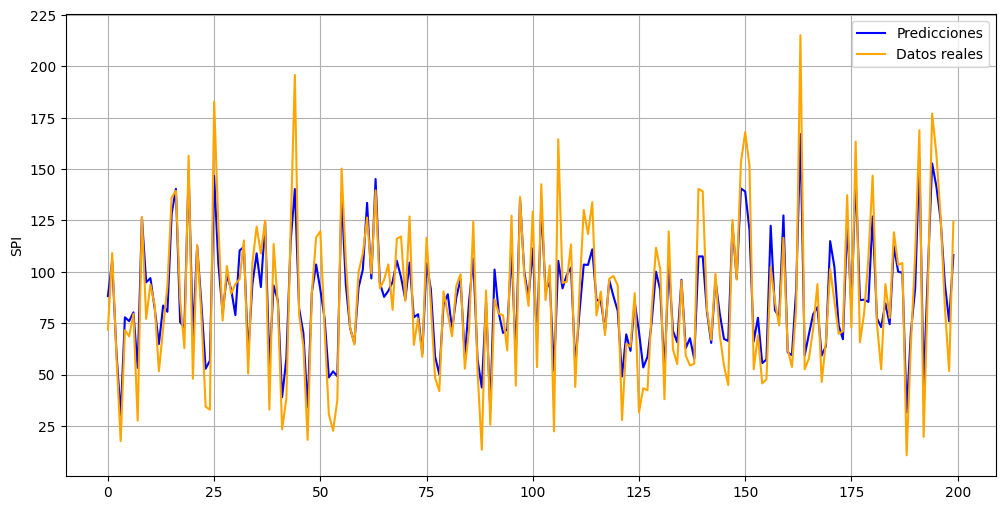

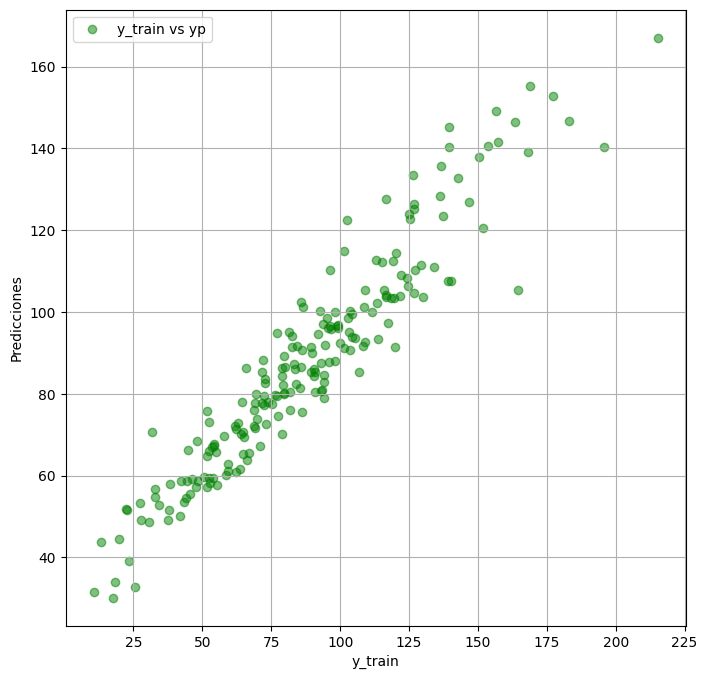

In [110]:
target = 'SPI'
root = '../03_BBDD/data_dureza_train.xlsx'
root_model = '../04_Model/Hardness/SPI/'
df = pd.read_excel(root)
assay = df[['Cu%', 'Mo%','AgPPM', 'AuPPM', 'Al%', 'Ca%', 'Fe%', 'Mg%', 'Na%', 'S%']]
hardness= df[target]
#Assay = X, Hardness = Y
X_train, X_test, y_train, y_test = train_test_split(assay, hardness, test_size=0.2, random_state=42)
# Normalizar los datos
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print('RandomForestRegressor')

rg = {'bootstrap': [True, False], 
        'max_depth': [10,50,100,500,750,1000,None],
        'max_features': ['auto', 'sqrt','log2',0.2,0.3,0.6,0.9], 
        'min_samples_leaf': [1,2,4,16,32,64,128],
        'min_samples_split': [2,5,10,20,40,80], 
        'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

gsc = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=rg, n_iter=100, cv=5, verbose=0, random_state=42,n_jobs=-1)
#gsc = GridSearchCV(estimator=RandomForestRegressor(), cv=5, param_grid=rg , scoring='neg_mean_absolute_error',n_jobs=-1)

grid_result = gsc.fit(X_train, y_train)
best_params = grid_result.best_params_
rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], min_samples_leaf=best_params["min_samples_leaf"],max_features= best_params["max_features"],
                                min_samples_split=best_params["min_samples_split"],bootstrap=best_params["bootstrap"],verbose=0, warm_start=True,random_state=42,n_jobs=-1)
print("Best Params: ",best_params)
rfr.fit(X_train, y_train)
file_model= 'model_rf'+'.pkl'
file_model = os.path.join(root_model, file_model)
file_scaler= 'scaler_rf.pkl'
file_scaler = os.path.join(root_model, file_scaler)
joblib.dump(rfr,file_model)
joblib.dump(scaler,file_scaler)

print("Scoring Analysis and Graphics")
scoring = {'abs_error': 'neg_mean_absolute_error', 'squared_error': 'neg_mean_squared_error', 'r2': 'r2','explained_variance': 'explained_variance'}
scores = cross_validate(rfr, X_train, y_train, cv=10, scoring=scoring, return_train_score=True)
print("Random Forest Regression Analysis")
print("MAE :", abs(scores['train_abs_error'].mean()), "| RMSE :",
        math.sqrt(abs(scores['train_squared_error'].mean())),
        "| R2 :", scores['train_r2'].mean(), "| EV :", scores['train_explained_variance'].mean())
yp = rfr.predict(X_train)

def Grafics_ML(y_train,yp):
        # Primera gráfica de líneas
        fig, ax1 = plt.subplots(figsize=(12, 6))
        t = np.arange(0, len(yp), 1)
        ax1.plot(t, yp, label='Predicciones', color='blue')
        ax1.plot(t, y_train, label='Datos reales', color='orange')
        ax1.set_ylabel('SPI')
        ax1.grid(True)
        ax1.legend()

        # Segunda gráfica de scatter plot
        fig2, ax2 = plt.subplots(figsize=(8, 8))
        ax2.scatter(y_train, yp, label='y_train vs yp', color='green', alpha=0.5)
        ax2.set_xlabel('y_train')
        ax2.set_ylabel('Predicciones')
        ax2.grid(True)
        ax2.legend()

        plt.show()


(200, 1)

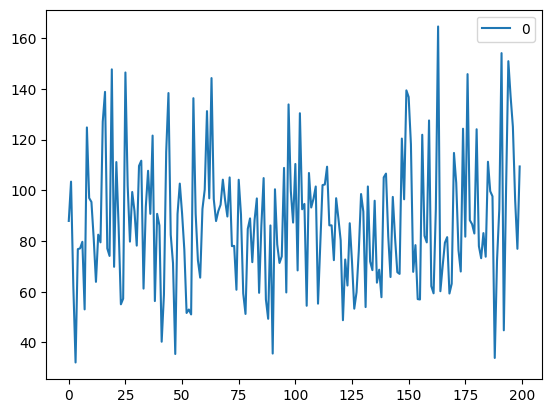

In [94]:
sns.lineplot(pd.DataFrame(yp))
pd.DataFrame(yp).shape

132     71.854
225    109.126
238     59.249
119     17.601
136     71.577
        ...   
106    157.439
14     126.720
92      82.680
179     51.681
102    124.307
Name: SPI, Length: 200, dtype: float64

(200, 1)

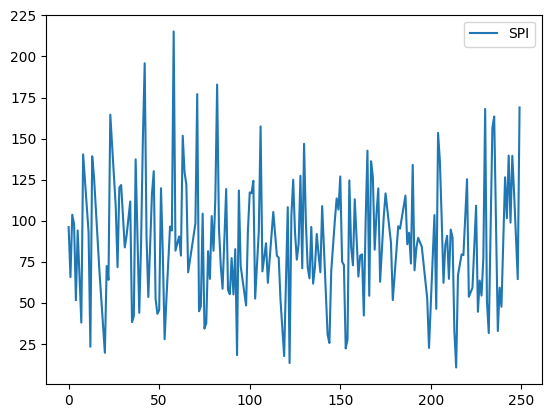

In [95]:
sns.lineplot(pd.DataFrame(y_train))
pd.DataFrame(y_train).shape
